In [5]:
!find / -name AS2.ipynb 2>/dev/null


/System/Volumes/Data/Users/eshavaryani/AS2.ipynb
/System/Volumes/Data/Users/eshavaryani/Downloads/AS2.ipynb
/Users/eshavaryani/AS2.ipynb
/Users/eshavaryani/Downloads/AS2.ipynb


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
import yfinance as yf
from datetime import datetime, timedelta

# Current date
today = datetime.today()

# Start and end dates within the last 30 days
start_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')  # Yesterday's date
end_date = today.strftime('%Y-%m-%d')  # Today's date

# Download data for BTC and LTC using yfinance
btc = yf.download("BTC-USD", start=start_date, end=end_date, interval='1m')
ltc = yf.download("LTC-USD", start=start_date, end=end_date, interval='1m')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [35]:
ltc_datetime = ltc.index
btc_datetime = btc.index

missing_datetimes = ltc_datetime[~ltc_datetime.isin(btc_datetime)]
ltc = ltc[~ltc.index.isin(missing_datetimes)]

if missing_datetimes.empty:
    print("For every datetime in ltc, there is a corresponding datetime in btc.")
else:
    print("There are missing datetimes in btc for some datetimes in ltc.")


There are missing datetimes in btc for some datetimes in ltc.


In [36]:
btc.shape

(1279, 6)

In [37]:
ltc.shape

(1274, 6)

In [38]:
btc

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-05-09 00:01:00+00:00,61162.906250,61162.906250,61162.906250,61162.906250,61162.906250,0
2024-05-09 00:02:00+00:00,61147.816406,61147.816406,61147.816406,61147.816406,61147.816406,0
2024-05-09 00:04:00+00:00,61204.425781,61204.425781,61204.425781,61204.425781,61204.425781,0
2024-05-09 00:05:00+00:00,61224.207031,61224.207031,61224.207031,61224.207031,61224.207031,0
2024-05-09 00:07:00+00:00,61190.320312,61190.320312,61190.320312,61190.320312,61190.320312,2369536
...,...,...,...,...,...,...
2024-05-09 23:54:00+00:00,63147.433594,63147.433594,63147.433594,63147.433594,63147.433594,0
2024-05-09 23:55:00+00:00,63098.777344,63098.777344,63098.777344,63098.777344,63098.777344,8871936
2024-05-09 23:56:00+00:00,63094.082031,63094.082031,63094.082031,63094.082031,63094.082031,19863552


In [39]:
ltc

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-05-09 00:01:00+00:00,81.636360,81.636360,81.636360,81.636360,81.636360,0
2024-05-09 00:02:00+00:00,81.658043,81.658043,81.658043,81.658043,81.658043,0
2024-05-09 00:04:00+00:00,81.759689,81.759689,81.759689,81.759689,81.759689,32128
2024-05-09 00:05:00+00:00,81.758217,81.758217,81.758217,81.758217,81.758217,563776
2024-05-09 00:07:00+00:00,81.724754,81.724754,81.724754,81.724754,81.724754,0
...,...,...,...,...,...,...
2024-05-09 23:54:00+00:00,83.023506,83.023506,83.023506,83.023506,83.023506,40800
2024-05-09 23:55:00+00:00,83.055229,83.055229,83.055229,83.055229,83.055229,0
2024-05-09 23:56:00+00:00,83.052147,83.052147,83.052147,83.052147,83.052147,37344


In [40]:
p1 = btc['Adj Close']
p2 = ltc['Adj Close']

In [42]:
import numpy as np
from statsmodels.tsa.stattools import coint

# Drop any missing values (if any)
p1 = p1.dropna()
p2 = p2.dropna()

# Make sure that both p1 and p2 are of equal length
min_length = min(len(p1), len(p2))
p1 = p1.iloc[:min_length]
p2 = p2.iloc[:min_length]

# Cointegration test
score, p_value, _ = coint(p1, p2)

# Print the test result
print(f'Engle-Granger cointegration test p-value: {p_value}')


Engle-Granger cointegration test p-value: 0.7398091385431895


In [45]:
import numpy as np
import pandas as pd

# Assuming 'p1' and 'p2' are your BTC and LTC 'Adj Close' price series respectively
p1 = btc['Adj Close']
p2 = ltc['Adj Close']

# Calculate logarithmic returns
r1 = np.log(p1 / p1.shift(1))
r2 = np.log(p2 / p2.shift(1))

# Drop NaN values that result from the shift operation
r1 = r1.dropna()
r2 = r2.dropna()

# Calculate the correlation coefficient (rho)
rho = r1.corr(r2)

print(f"Estimated ρ (rho) is: {rho}")


Estimated ρ (rho) is: 0.22501642878633557


In [47]:
mu_1 = r1.mean()*1411
mu_2 = r2.mean()*1411
sigma_1 = r1.std()*np.sqrt(1411)
sigma_2 = r2.std()*np.sqrt(1411)
z_0 = 0
print(f'mu_1: {mu_1}')
print(f'mu_2: {mu_2}')
print(f'sigma_1: {sigma_1}')
print(f'sigma_2: {sigma_2}')

mu_1: 0.033492882475906115
mu_2: 0.019174935863683035
sigma_1: 0.021095584086329236
sigma_2: 0.01564189312123414


In [49]:
from scipy.stats import linregress
import numpy as np

# Calculate logarithmic returns
log_returns_btc = np.log(btc['Adj Close'] / btc['Adj Close'].shift(1))
log_returns_ltc = np.log(ltc['Adj Close'] / ltc['Adj Close'].shift(1))

# Drop NaN values from both series to ensure they are of the same length
log_returns_btc = log_returns_btc.dropna()
log_returns_ltc = log_returns_ltc.dropna()

# Align both series to ensure they are of the same length
log_returns_btc, log_returns_ltc = log_returns_btc.align(log_returns_ltc, join='inner')

# Perform linear regression
result = linregress(log_returns_ltc, log_returns_btc)
beta = result.slope

print(f'beta: {beta}')


beta: 0.3035404933053606


In [50]:
gamma = 0.5
delta=1
rho=r1.corr(r2)
T=1
M=len(btc['Adj Close'])
print(f'rho: {rho}')

rho: 0.22501642878633557


In [51]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'z')

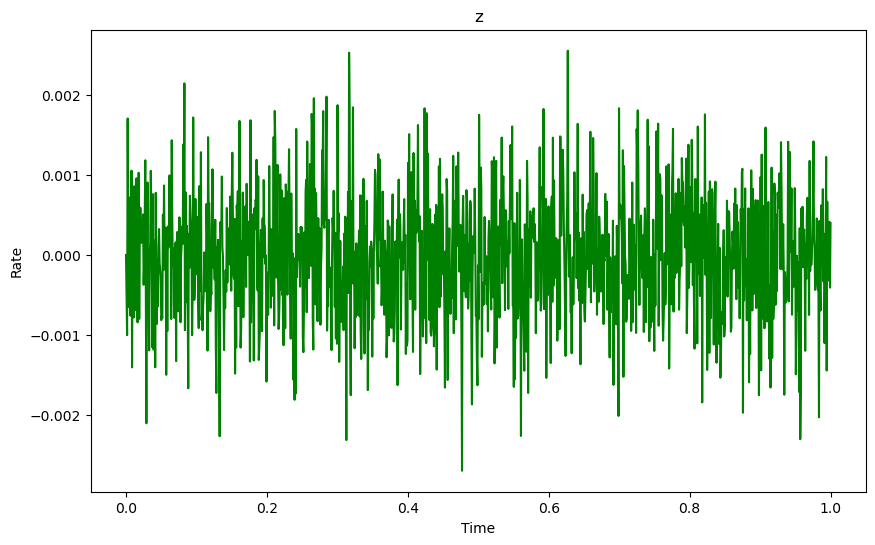

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [53]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
print(f'Pi_1: {Pi_1[t]}')
print(f'Pi_2: {Pi_2[t]}')
print(f'a[t]: {a[t]}')
print(f'b[t]: {b[t]}')
print(f'c[t]: {c[t]}')

Pi_1: [0.00214683]
Pi_2: [1.40280576]
a[t]: [0.]
b[t]: [-0.]
c[t]: [0.]


Text(0.5, 1.0, 'Weights')

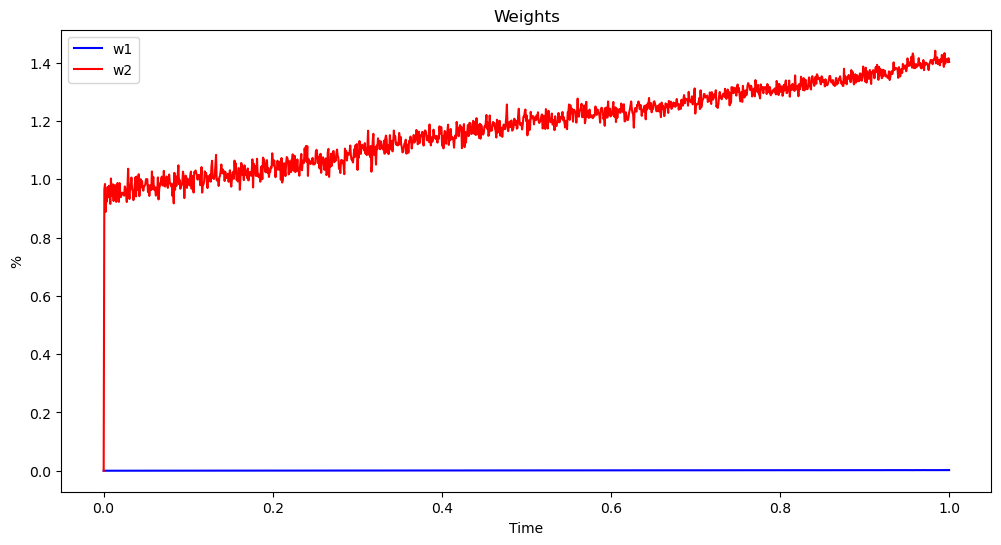

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

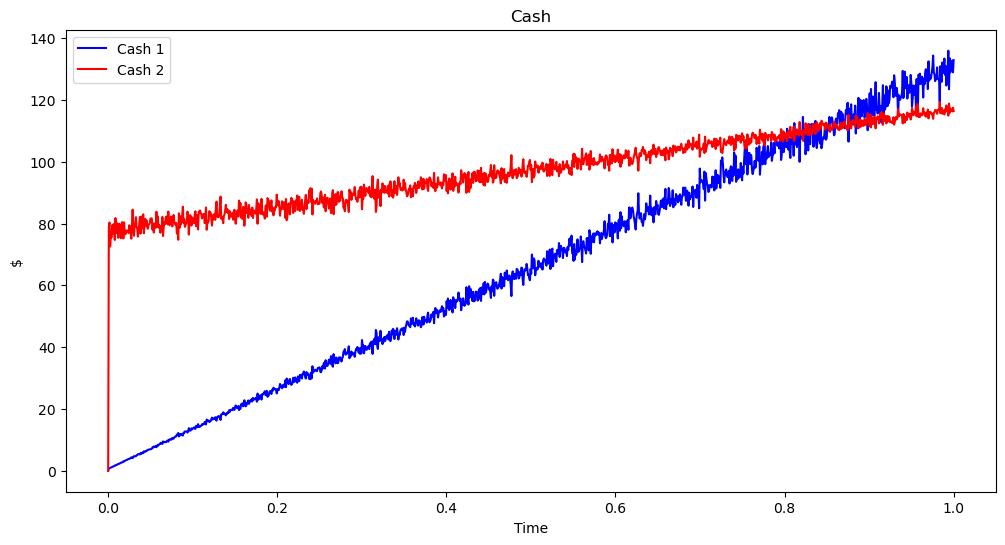

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

Text(0.5, 1.0, 'Comparison')

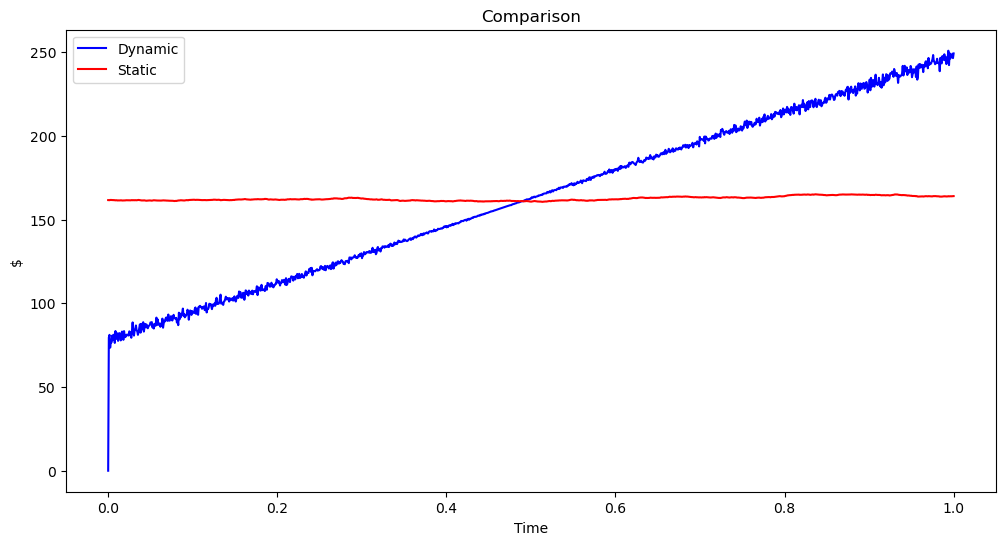

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [61]:
# Initial stock prices
S1_0 = 400  # Initial price of Stock 1
S2_0 = 800  # Initial price of Stock 2

# Expected annual returns (mean return)
mu_1 = 0.02  # Mean return of Stock 1
mu_2 = 0.04  # Mean return of Stock 2

# Volatility (standard deviation of returns)
sigma_1 = 0.1  # Volatility of Stock 1
sigma_2 = 0.05  # Volatility of Stock 2

# Initial value for some process z, possibly a factor or a control variable
z_0 = 0.02  # Initial value of z

# Regression coefficient (from a prior calculation or assumption)
beta = 1  # Beta coefficient, typically a hedge ratio in financial models

# Risk aversion coefficient
gamma = 1  # Gamma, representing risk-aversion level

# Discount factor or another model-specific parameter
delta = 0.5  # Delta, could represent a rate of time preference or decay factor

# Correlation between the returns of two assets
rho = -0.7  # Correlation coefficient between returns of Stock 1 and Stock 2

# Time period for the simulation or investment horizon (in years)
T = 1  # Time horizon of 1 year

# Number of time steps in the simulation (often matches trading days or minutes etc.)
M = 390  # Number of time steps, perhaps representing the number of trading minutes in a day


In [62]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [63]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

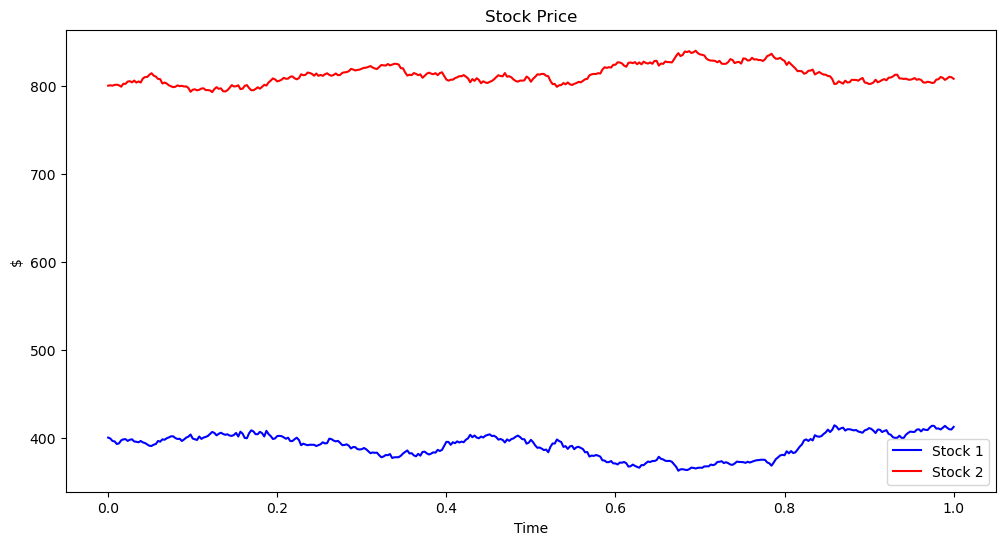

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'Alpha')

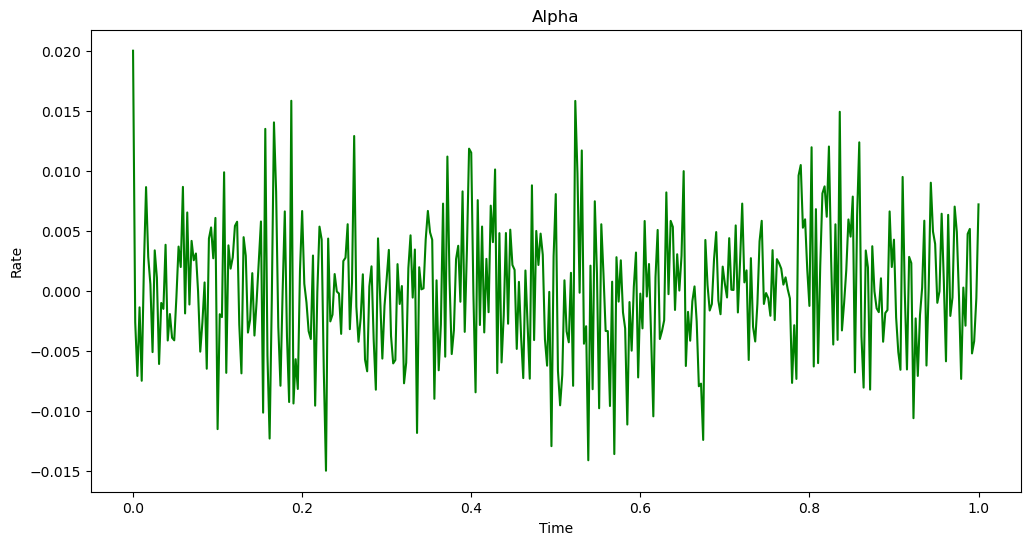

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Alpha')

In [67]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

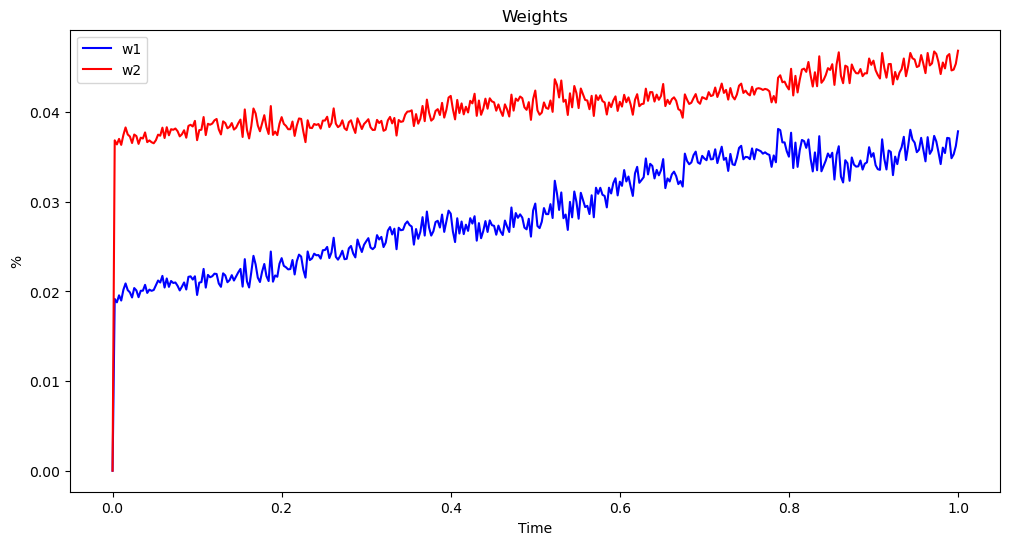

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

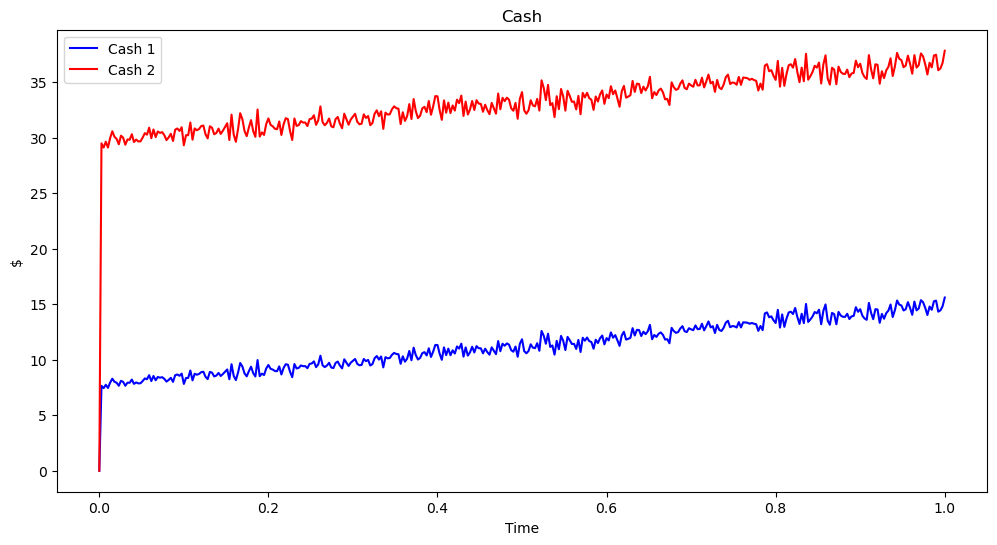

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [70]:
Pi_1.mean()

0.028865746880174827

In [71]:
Pi_2.mean()

0.040821353128996866

Text(0.5, 1.0, 'Comparison')

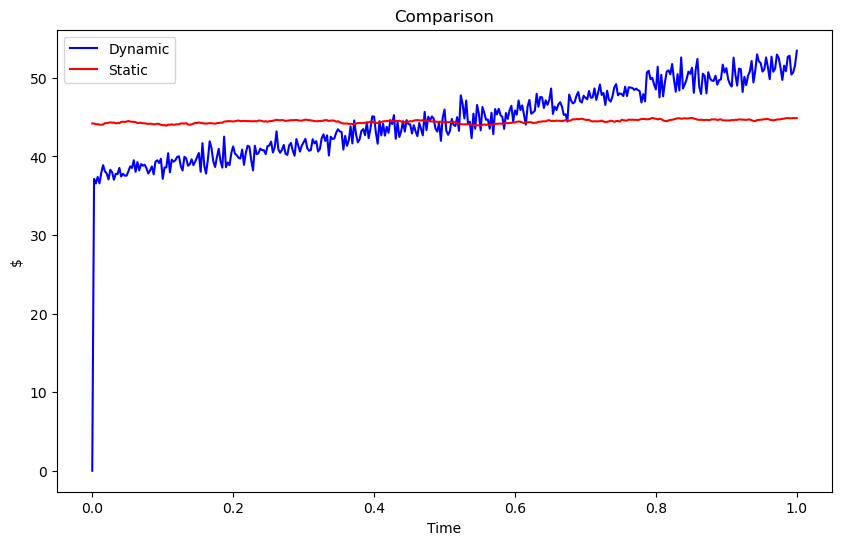

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')